<img src="imgs\banner_fcd.jpg" alt="bannersp" width="1100"  height="150">

## <span style="color:#2F749F;"><strong>📦 Sesión práctica 3: Análisis Multivariado</strong></span>
---
<p align="right">
  <a href="https://github.com/mariabda2/intro_data_2025/blob/main/sesiones_practicas/sp_3_maria_bernarda_salazar.ipynb?clone=true" target="_blank">
    <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Abrir en Colab"/>
  </a>
</p>


## <span style="color:black;"><strong>Datos del estudiante</strong></span>

In [1]:
# Solicitar datos al estudiante
nombre = input("Ingresa tu nombre completo: ")
correo = input("Ingresa tu correo electrónico: ")

# Mostrar los datos ingresados
print("\nResumen de datos ingresados:")
print(f"Nombre: {nombre}")
print(f"Correo electrónico: {correo}")

Ingresa tu nombre completo: Guillermo Mejia Uribe
Ingresa tu correo electrónico: guillermo.mejia@udea.edu.co

Resumen de datos ingresados:
Nombre: Guillermo Mejia Uribe
Correo electrónico: guillermo.mejia@udea.edu.co


## <span style="color:black;"><strong>Parte 3: Análisis Multivariado</strong></span>

### <span style="color:#2F749F;"><strong>Ejercicio1: Análisis de componentes principales</strong></span>

A partir de un conjunto de datos real sobre pingüinos antárticos, realiza un análisis multivariado utilizando PCA para reducir la dimensionalidad y visualizar agrupamientos por especie.

1. Carga el conjunto de datos penguins desde la librería seaborn `load_dataset("penguins")`.
2. Selecciona las siguientes variables morfológicas para el análisis:
   - 'bill_length_mm'
   - 'bill_depth_mm'
   - 'flipper_length_mm'
   - 'body_mass_g'
3. Estandariza las variables seleccionadas usando StandardScaler.
4. Aplica PCA()
5. Imprime las ecuaciones que obtuviste para el número de componentes que utilizaste
6. Grafica los resultados en un plano bidimensional (PC1 vs PC2), diferenciando por especie (ver imagen).
7. Interpreta visualmente qué especies se agrupan o separan mejor en el espacio reducido.

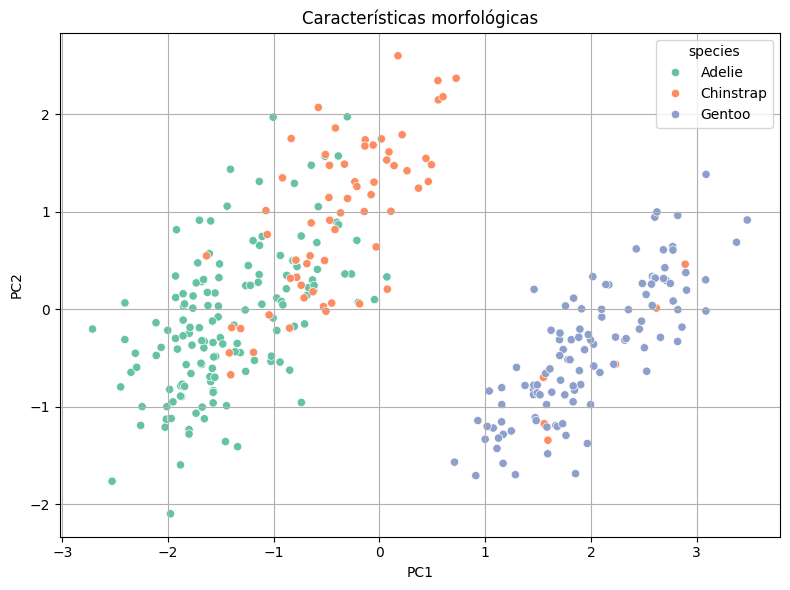


PC1 = 0.46×bill_length_mm + -0.40×bill_depth_mm + 0.58×flipper_length_mm + 0.55×body_mass_g
PC2 = 0.60×bill_length_mm + 0.80×bill_depth_mm + 0.00×flipper_length_mm + 0.08×body_mass_g


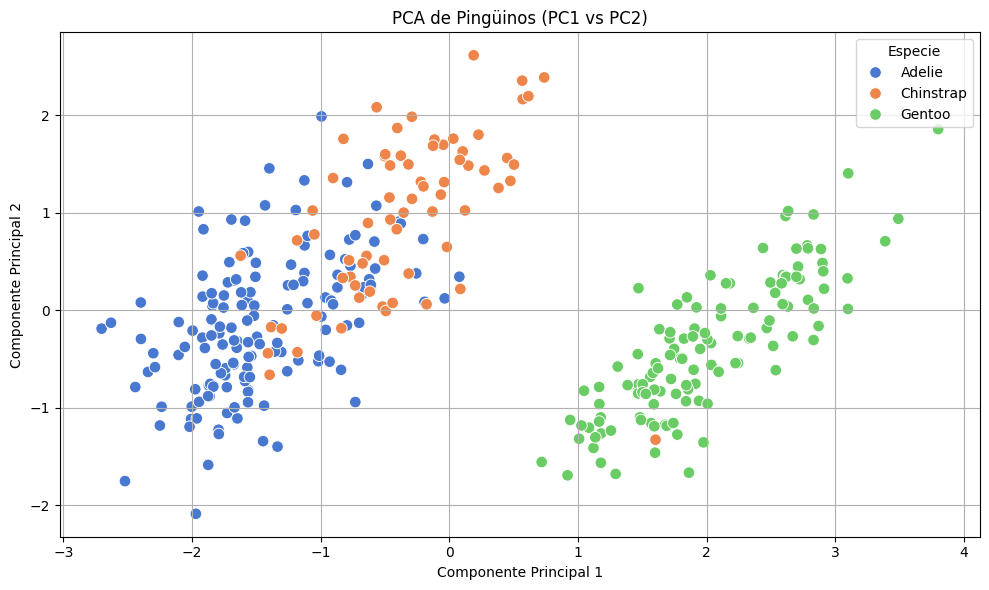

In [8]:
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Cargar datos
penguins = sns.load_dataset("penguins")

# Variables morfológicas
features = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
penguins_selected = penguins[features + ['species']].dropna()

X = penguins_selected[features]
y = penguins_selected['species']

# Estandarizar
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA a 2 componentes
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# DataFrame con PC1 y PC2
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['species'] = y

# Componentes
components = pca.components_

# Ecuaciones de los componentes principales
for i, component in enumerate(components):
    eq = " + ".join(f"{coef:.2f}×{feat}" for coef, feat in zip(component, features))
    print(f"PC{i+1} = {eq}")

# Grafico
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='species', palette='muted', s=70)
plt.title('PCA de Pingüinos (PC1 vs PC2)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.grid(True)
plt.legend(title='Especie')
plt.tight_layout()
plt.show()

# **Análisis del PCA aplicado al dataset de pingüinos**

**Objetivo del PCA:** Resumir la información de varias medidas físicas de los pingüinos en solo dos ejes para poder ver mejor cómo se agrupan las especies. En lugar de analizar cuatro variables separadas, se usa el PCA para concentrar la información más importante en dos componentes principales y así dibujar un gráfico que muestre las diferencias y similitudes entre especies.

**Interpretación de los Componentes Principales**

* Componente Principal 1 (PC1): combina sobre todo tamaño de aletas y peso del cuerpo, algo así como un indicador de “tamaño general” del pingüino.

* Componente Principal 2 (PC2): refleja más la forma del pico, es decir, la relación entre su longitud y su profundidad.

En conjunto, estos dos ejes nos permiten ver la mayor parte de la variación en los pingüinos con solo un gráfico 2D.

**Análisis de la gráfica (PC1 vs PC2): **

* Gentoo (verde): aparecen juntos y a la derecha, mostrando que son los pingüinos más grandes y con aletas más largas. Se distinguen claramente de las otras especies.

* Adelie (azul): quedan hacia la izquierda, con valores más bajos en PC1 y repartidos en PC2. Son más pequeños y con picos distintos.

* Chinstrap (naranja): se ubican entre los otros dos grupos; se parecen a Adelie pero se diferencian un poco más en la forma del pico.

**Conclusiones:**

* Gentoo se distingue claramente porque es la especie con características más grandes.

* Adelie y Chinstrap son más parecidos entre sí, aunque el segundo eje (forma del pico) ayuda a separarlos un poco.

* El PCA cumplió su objetivo: convertir varias medidas en dos ejes que nos dejan ver de un vistazo cómo se parecen o se diferencian las especies.

* Este tipo de análisis es muy útil para explorar datos reales y encontrar patrones sin complicarse con muchas variables.

### <span style="color:#2F749F;"><strong>Ejercicio 2: Regresión Lineal Múltiple</strong></span>  

A partir de un conjunto de datos real sobre diamantes, realiza un análisis de regresión lineal múltiple para predecir el precio en función de variables numéricas relacionadas con sus características físicas.  

1. Carga el conjunto de datos `diamonds` desde la librería seaborn `load_dataset("diamonds")`.  
2. Selecciona las siguientes variables predictoras para el análisis:  
   - `carat`  
   - `depth`  
   - `table`  
   - `x`  
   - `y`  
   - `z`  
3. Define como variable respuesta el precio (`price`).  
4. Divide los datos en entrenamiento y prueba para validar el modelo.  
5. Ajusta un modelo de **Regresión Lineal Múltiple** usando `statsmodels.OLS()`.  
6. Imprime el resumen del modelo (coeficientes, significancia, R² ajustado, etc.).  
7. Evalúa el desempeño del modelo con métricas de ajuste como **RMSE** y **R²** en el conjunto de prueba.  
8. Grafica los valores reales vs. los valores predichos del precio para interpretar la calidad del ajuste.  

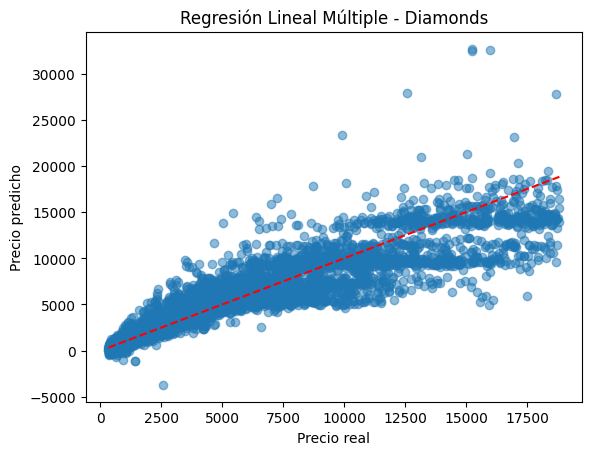



                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                 4.317e+04
Date:                Fri, 19 Sep 2025   Prob (F-statistic):               0.00
Time:                        05:28:08   Log-Likelihood:            -3.7681e+05
No. Observations:               43136   AIC:                         7.536e+05
Df Residuals:                   43129   BIC:                         7.537e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.855e+04    798.920     23.218      0.0

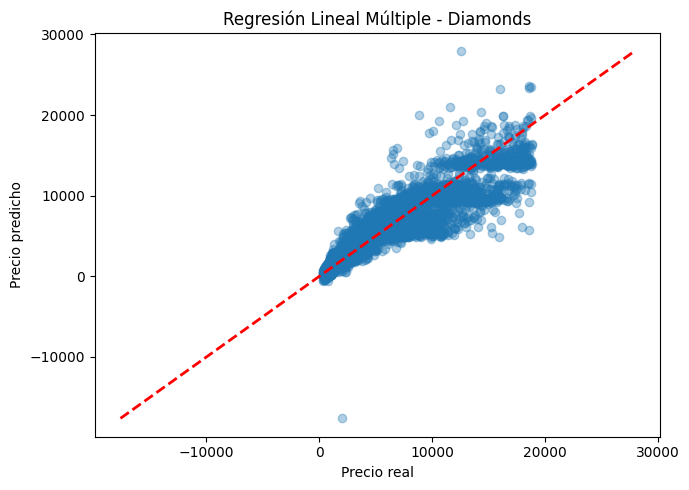

In [9]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


# Cargar datos
diamonds = sns.load_dataset("diamonds")

# Selección de variables (y limpieza básica)
vars_pred = ["carat", "depth", "table", "x", "y", "z"]
df = diamonds[vars_pred + ["price"]].dropna()
df = df[(df["x"] > 0) & (df["y"] > 0) & (df["z"] > 0)]  # quitar outliers obvios

X = df[vars_pred]
y = df["price"]

# Train / Test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Intercepto y ajustar OLS
X_train_const = sm.add_constant(X_train, has_constant="add")
X_test_const  = sm.add_constant(X_test,  has_constant="add")

modelo = sm.OLS(y_train, X_train_const).fit()

# Resumen del modelo
print(modelo.summary())

# Predicción y métricas en test
y_pred = modelo.predict(X_test_const)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2   = r2_score(y_test, y_pred)

print(f"\nRMSE en test: {rmse:.2f}")
print(f"R² en test  : {r2:.4f}")

# Graficar
plt.figure(figsize=(7, 5))
plt.scatter(y_test, y_pred, alpha=0.35)
lim_inf = min(y_test.min(), y_pred.min())
lim_sup = max(y_test.max(), y_pred.max())
plt.plot([lim_inf, lim_sup], [lim_inf, lim_sup], "r--", linewidth=2)
plt.title("Regresión Lineal Múltiple - Diamonds")
plt.xlabel("Precio real")
plt.ylabel("Precio predicho")
plt.tight_layout()
plt.show()

# **Diagnosticos adicionales, Analisis y Conclusiones**

Se decide hacer diagnósticos adicionales (VIF, residuos vs ajustados, Breusch–Pagan, QQ-plot) para:

* Comprobar supuestos del modelo lineal y no solo ajustar y predecir.

* Detectar problemas comunes como multicolinealidad, heterocedasticidad y no normalidad de residuos.

* Fortalecer la interpretación: entender si el modelo es confiable para inferencia estadística, no solo para predicción.

In [16]:
# VIF: Variance Inflation Factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

X_vif = X_train.copy()  # sin la constante
vif_tbl = pd.DataFrame({
    "variable": X_vif.columns,
    "VIF": [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
}).sort_values("VIF", ascending=False)

print("\n--- VIF (Multicolinealidad) ---")
print(vif_tbl.to_string(index=False))

# Reglas:
# VIF > 10  -> multicolinealidad alta (preocupante)
# VIF 5–10 -> moderada (vigilar)
# VIF < 5  -> aceptable



--- VIF (Multicolinealidad) ---
variable         VIF
       z 3073.530790
       x 2606.004623
   depth  895.534813
   table  677.909137
       y  576.361508
   carat   89.747960


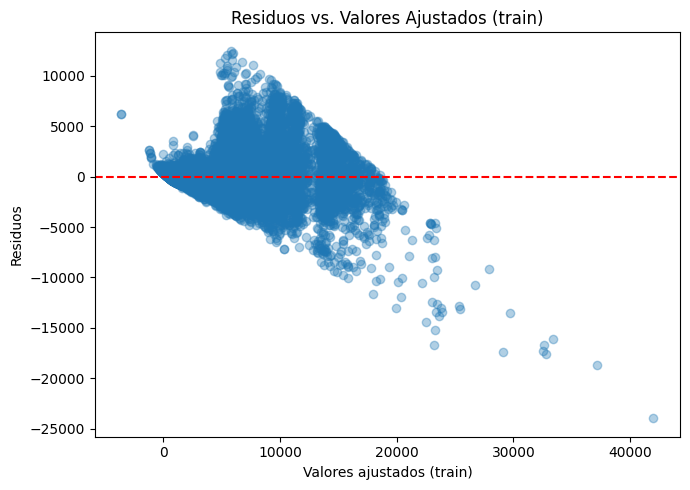

In [12]:
# Residuos vs Ajustados - Homocedasticidad
ajustados = modelo.predict(X_train_const)
residuos  = y_train - ajustados

plt.figure(figsize=(7,5))
plt.scatter(ajustados, residuos, alpha=0.35)
plt.axhline(0, color="red", linestyle="--", linewidth=1.5)
plt.title("Residuos vs. Valores Ajustados (train)")
plt.xlabel("Valores ajustados (train)")
plt.ylabel("Residuos")
plt.tight_layout()
plt.show()

In [14]:
# Breusch–Pagan
from statsmodels.stats.diagnostic import het_breuschpagan

bp_stat, bp_pvalue, f_stat, f_pvalue = het_breuschpagan(residuos, X_train_const)
print("\n--- Breusch–Pagan (H0: homocedasticidad) ---")
print(f"LM stat  : {bp_stat:.4f}")
print(f"LM p-val : {bp_pvalue:.4f}")
print(f"F stat   : {f_stat:.4f}")
print(f"F p-val  : {f_pvalue:.4f}")


--- Breusch–Pagan (H0: homocedasticidad) ---
LM stat  : 8004.9283
LM p-val : 0.0000
F stat   : 1637.8879
F p-val  : 0.0000


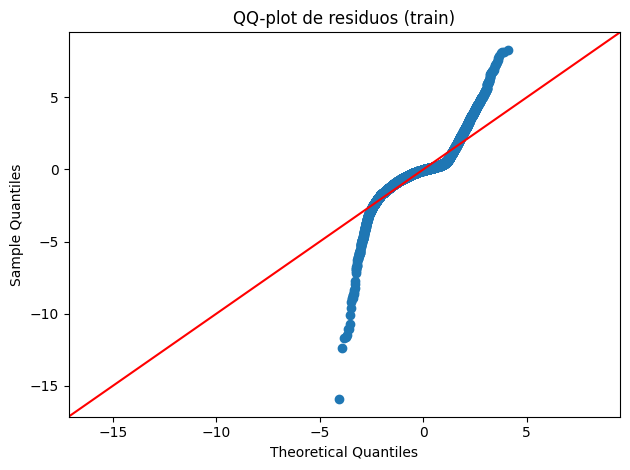

In [15]:
# QQ-plot de residuos
import statsmodels.api as sm

sm.qqplot(residuos, line="45", fit=True)
plt.title("QQ-plot de residuos (train)")
plt.tight_layout()
plt.show()

# **Análisis Regresión Lineal Múltiple con Diamonds**

**Objetivo del PCA: ** El objetivo fue predecir el precio de los diamantes usando medidas físicas como peso en quilates (carat), profundidad, tabla y dimensiones (x, y, z). Se busca ver qué características afectan más el precio y qué tan bien el modelo puede predecirlo.

**Resultados principales**

* El modelo logró explicar cerca del 86% de la variación del precio, lo que es un resultado muy bueno para datos reales.

* El error promedio de predicción es de unos 1460 dólares, así que en general las predicciones son bastante cercanas al precio real.

* Carat (el peso en quilates) es claramente la variable que más empuja el precio hacia arriba.

**Revision del modelo: **

1. Variables muy relacionadas entre sí (multicolinealidad):

  * Usando la “regla rápida” (VIF >10 significa problema) vimos que todas las variables tienen valores muy altos.

  * Esto significa que muchas características se parecen demasiado entre sí (por ejemplo peso y tamaño).

  * Para predecir no pasa nada grave, pero para interpretar cada coeficiente por separado hay que tener cuidado porque pueden salir inestables.

2. Errores con distinta dispersión (heterocedasticidad):

  * En el gráfico de residuos vimos un patrón tipo “abanico”: para precios altos los errores son más grandes y se van abriendo.

  * Según la prueba Breusch–Pagan, el p-value menor a 0.05, que con la regla rápida significa que los errores no tienen la misma variación en todo el rango de precios.

  * El modelo es menos preciso para diamantes muy caros.

3. Residuos no del todo normales:

  * En el QQ-plot los puntos se salen de la línea en los extremos.

  * Esto quiere decir que hay valores extremos y que los errores no son perfectamente “en forma de campana”.

  * Para predicción no pasa nada grave, pero para conclusiones estadísticas hay que tenerlo en cuenta.
**Interpretaciones de diagnosticos adicionales:**


**Conclusiones **

* El modelo predice bastante bien en promedio (R²≈0.86), sobre todo para diamantes de precios bajos y medios.

* Carat es la variable más importante para el precio.

* Muchas variables se parecen entre sí (peso y dimensiones), lo que puede confundir la interpretación de cada una.

* Los errores son mayores en diamantes caros, así que el modelo no es igual de confiable en todos los rangos.

* Para mejorar el modelo podríamos:

    * Usar transformaciones (por ejemplo log del precio).

    * Usar errores robustos para que los resultados sean menos sensibles a variaciones.

    * Probar otros modelos (árboles de decisión, random forest) que manejen mejor datos con este tipo de problemas.


**En resumen**

Se construyo un modelo para predecir precios de diamantes con seis características físicas. El modelo predice muy bien (explica el 86% de la variación) y el peso en quilates es la característica más influyente. Sin embargo, muchas variables están muy relacionadas entre sí y el modelo es menos preciso para diamantes muy caros. Estas revisiones adicionales nos ayudaron a entender mejor las limitaciones y cómo podríamos mejorar el modelo.

| Diagnóstico                        | Regla rápida                                                                                                                   | Qué significa en este ejercicio                                                                                                                                      |
| ---------------------------------- | ------------------------------------------------------------------------------------------------------------------------------ | -------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **Multicolinealidad (VIF)**        | - **VIF <5** → aceptable<br>- **VIF 5–10** → moderada<br>- **VIF >10** → preocupante                                           | Los VIF son muy altos (≫10), lo que indica que las variables están muy relacionadas entre sí. Para predecir no es grave, pero complica interpretar cada coeficiente. |
| **Residuos vs. Valores Ajustados** | - **Nube sin patrón alrededor de 0** → bien (varianza constante)<br>- **Forma de abanico/cone** → problema (varianza desigual) | Se ve un “abanico” en los precios altos: el modelo comete errores más grandes cuando predice diamantes caros.                                                        |
| **Prueba Breusch–Pagan**           | - **p-value ≥0.05** → no hay evidencia de problema<br>- **p-value <0.05** → hay evidencia de heterocedasticidad                | p-value=0.0000: confirma lo que se ve en el gráfico, los errores no tienen la misma variación en todo el rango.                                                      |
| **QQ-plot de residuos**            | - **Puntos alineados con la diagonal** → normalidad<br>- **Puntos se apartan en las colas** → no normalidad                    | Se observa desviación en las colas, indicando residuos con valores extremos y no perfectamente normales.                                                             |
